# Best Neighborhood decided by Group World Justice Returns!
We decided that the best neighborhood in Pittsburgh is determined by the one you are most likely to die in.

## Crime Rate

### Import Statements

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

arrest = pd.read_csv("arrests.csv")

### Counts the number of fatal/life-threatening arrests in each neighborhood
#### Not all arrests could or will result in a death so...
 I limited it to more severe offenses: Harassment, stalking, homicide, assault, misuse of firearms, reckless driving, terroristic threats, kidnapping, murder, strangulation, and missiles

In [3]:
severity = arrest['OFFENSES'].str.contains('Harassment|Stalking|Homicide|Assault|Firearms|Missiles|Reckless Driving|Terroristic Threats|Kidnapping|Murder|Strangulation', regex = True).fillna(False)
crimes = arrest[severity]
crimes.sample(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
18853,1998442,18056967,26.0,F,B,2018-03-28T01:30:00,"2000 Block De Ruad ST Pittsburgh, PA 15219",2701 Simple Assault.,"2000 Block De Ruad ST Pittsburgh, PA 15219",West Oakland,4,402.0,2.0,5.0,-80.041907,40.451674
12258,1989915,17166650,48.0,M,B,2017-08-31T16:00:00,Federal ST S & General Robinson ST E Pittsburg...,6106 Firearms not to be Carried without a Lice...,"West Commons & South Commons Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.006896,40.450009
49320,2038943,21111500,32.0,M,W,2021-06-29T23:30:00,"900 Block Second AV Pittsburgh, PA 15219",1312 Notice of Change of Name or Address. / 17...,"1600 Block Sterling ST Pittsburgh, PA 15210",South Side Slopes,3,1608.0,3.0,3.0,-79.974349,40.418226
17222,1996358,18020226,39.0,M,B,2018-02-01T00:30:00,"7100 Block Jonathan ST Pittsburgh, PA 15208",2701 Simple Assault. / 3304 Criminal Mischief....,"1800 Block Calistoga ST Pittsburgh, PA 15221",East Hills,5,1306.0,9.0,2.0,-79.877209,40.451313
53858,2045467,22018544,25.0,F,W,2022-02-06T23:29:00,"1500 Block E Carson ST Pittsburgh, PA 15203",2702 Aggravated Assault. / 5503 Disorderly Con...,"1500 Block E Carson ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.983310,40.428693


This restriction takes the original arrest dataframe and reduces it by **33,512** datapoints.

### Graphs data

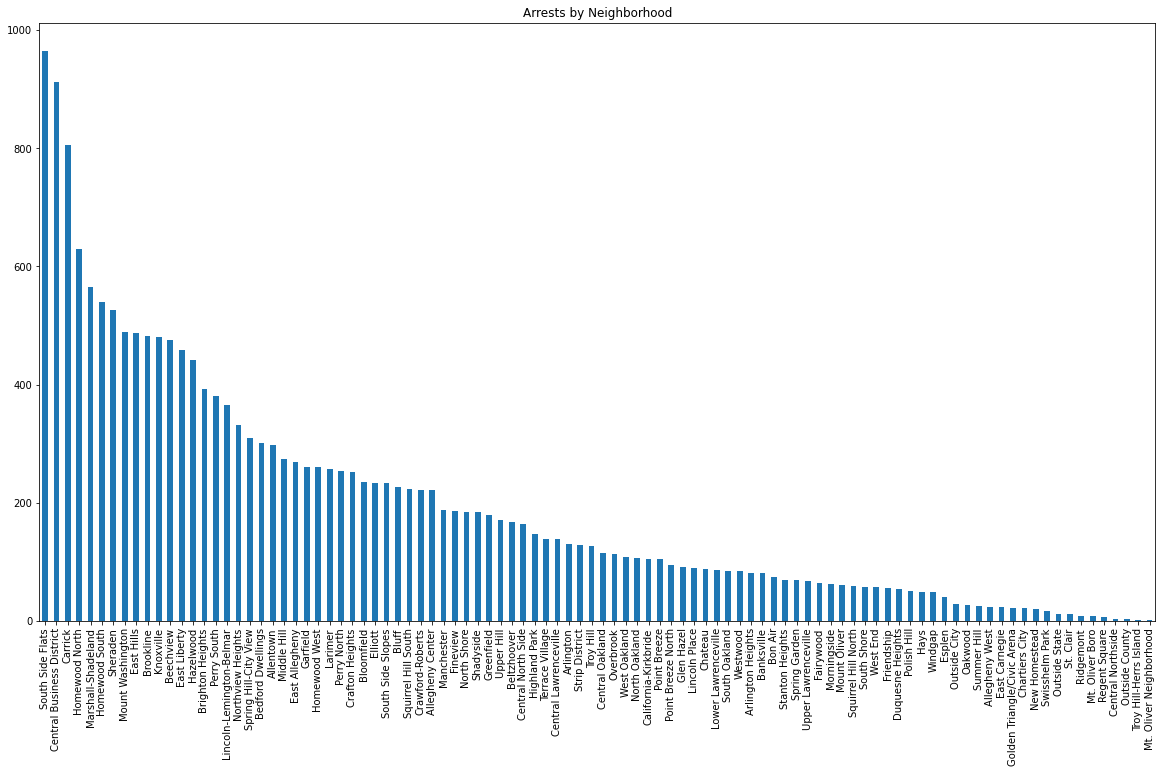

In [7]:
arrestNeighborhood = crimes["INCIDENTNEIGHBORHOOD"]
crimes["INCIDENTNEIGHBORHOOD"].value_counts().sort_values(ascending = False).plot.bar(figsize=(20,11), title = "Arrests by Neighborhood")

The highest *overall* arrest data was in the Central Business District but when restricted to the more severe offenses, **South Side Flats** surpassed Central Business District by 52 arrests.

In [ ]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#neighborhoods.plot(figsize=(20,11)) # plot the geopandas dataframe# do the merge
crime_map = neighborhoods.merge(arrestNeighborhood, how='left', left_on='hood', right_on="INCIDENTNEIGHBORHOOD")
crime_map
#crime_map.plot(column='number_of_steps')

The barchart is a headache to look at so I plan on plotting the data onto a cloropleth map to better visualoze the dense data.

## Fires

### Importing Data

The data contains the csv file that has the metrics needed to determine which neighborhood has the most fires. 
I plan to use this data throughout my findings. 

In [7]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

dataset = pd.read_csv("Fires.csv")
dataset

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,F220022447,111.0,Building fire,"4600 BLOCK ROSINA WAY, PITTSBURGH PA 15224",2022-03-31T22:07:32,1,231EN06,903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-6,NaN,NaN
8424,F220021639,131.0,Passenger vehicle fire,"1300 BLOCK CENTER ST, WILKINSBURG PA 15221",2022-03-29T02:18:18,0,231EN16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-16,NaN,NaN
8425,F220022826,150.0,"Outside rubbish fire, Other","2100 BLOCK BROWNSVILLE RD, PITTSBURGH PA 15210",2022-04-02T15:36:04,0,231EN22,2901.0,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-12,40.393200,-79.986524
8426,F220023419,150.0,"Outside rubbish fire, Other","200 BLOCK THE BOULEVARD ST, PITTSBURGH PA 15226",2022-04-05T09:07:03,0,231EN23,2902.0,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-12,40.401099,-79.985736


### The neighborhoods with the most fires.

As you can see the neighborhood with the most fires involving all types of fires is - Carrick - involving building fires, veichle fires, and rubbish/trash fires overall.

In [8]:
# load in the fire data file
data = pd.read_csv("Fires.csv", index_col="neighborhood", parse_dates=True)
data1 = data.iloc[:,8] 
data1.groupby('neighborhood').count().sort_values(ascending= False)

neighborhood
Carrick                      262
Squirrel Hill South          233
Central Business District    232
South Side Flats             225
Hazelwood                    217
                            ... 
St. Clair                     11
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  7
Mount Oliver Borough           3
Name: council_district, Length: 91, dtype: int64

### Barchart of the data!
A visual helps to see the data more clearly

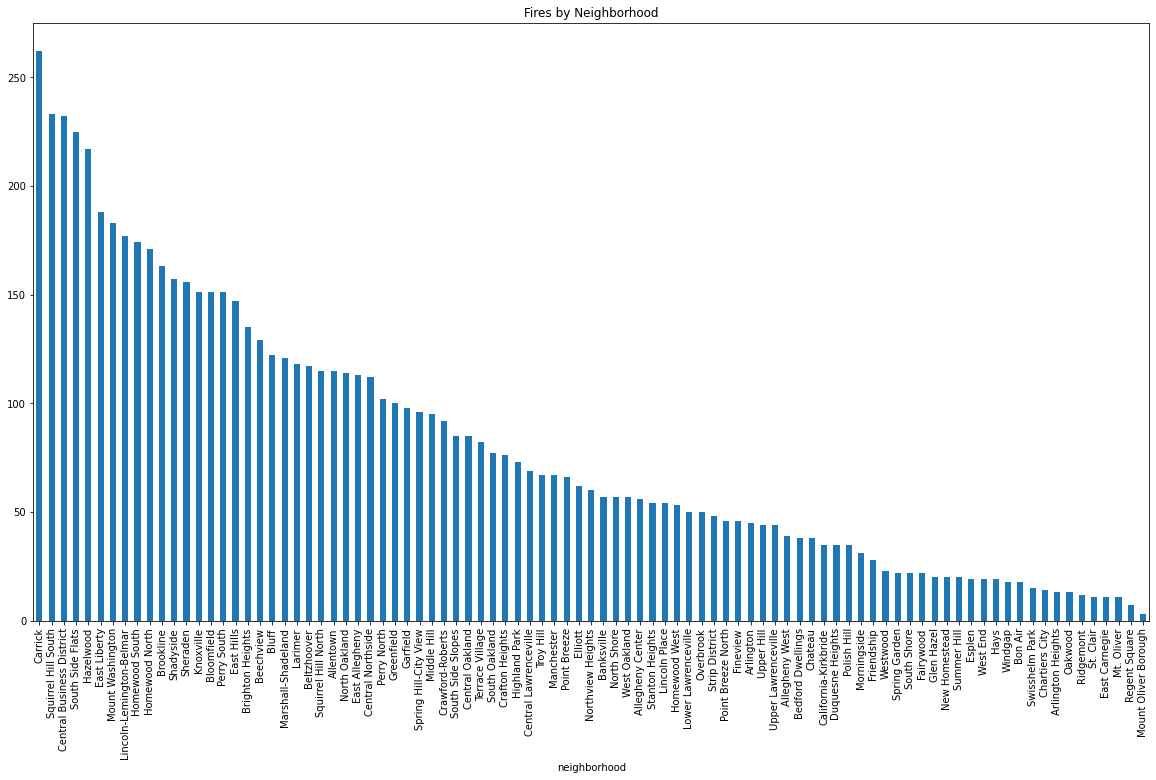

In [9]:
data1.groupby('neighborhood').count().sort_values(ascending= False).plot.bar(figsize = (20, 11), title = "Fires by Neighborhood")

## Pools
Pools are a great way to have fun in the sun with the family. They are also a great place to die! Every year 360 people die from drowning in pools, that's why we are looking at which neighborhoods have the most pools.

#### First, we have to import pandas:

In [10]:
import pandas as pd

#### Now, we can start:

In [11]:
#Creates a dataframe for our csv
pools = pd.read_csv('pool.csv',index_col = 'neighborhood')

#Creates a query mask that isolates all pools from the list
pool = pools['type'] == 'Pool'
pools = pools[pool].iloc[:,2]

#Groups the data by neighborhoods, then counts the number of pools in each neighborhood and sorts
pools = pools.groupby('neighborhood').count().sort_values(ascending = False)

#### Now, we can plot:

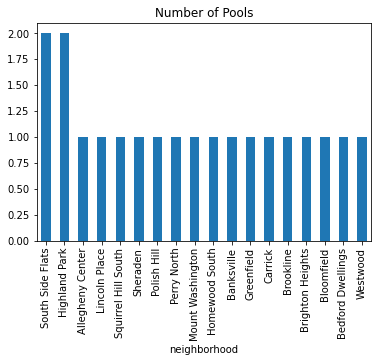

In [12]:
#Plots data
pools.plot.bar(title = "Number of Pools")

### So, what did we learn?

We learned that South Side Flats and Highland Park have the most pools. Which means that these two neighborhoods have the highest capacity for swimmers, which also means a higher chances of drowning!

## Overall Result

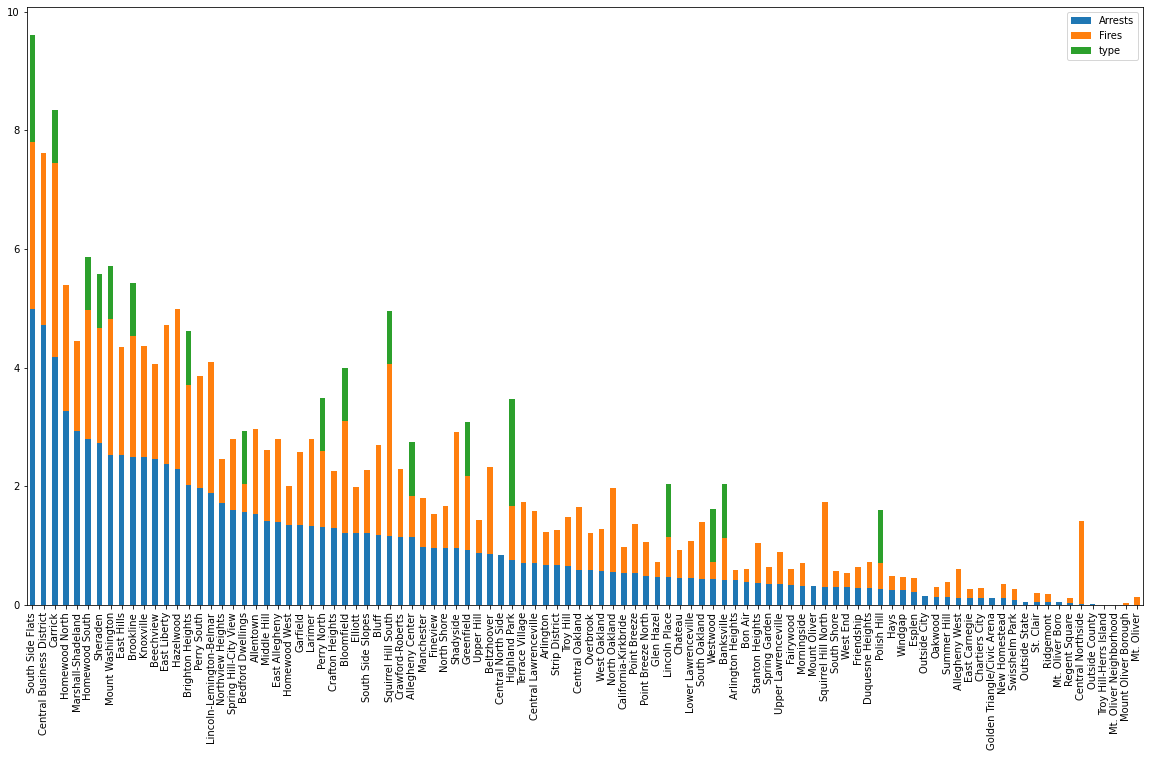

In [73]:
df = pd.concat([crimes["INCIDENTNEIGHBORHOOD"].value_counts()/193.194, data1.groupby('neighborhood').count()/80.143], keys = ["Arrests", "Fires"], axis = 1)
df2 = pd.concat([df, pools/1.111], axis = 1)
df2.plot.bar(stacked=True, figsize=(20,11))

## South Side Flats for the win!
With Carrick not far behind, taking second place

### Ryan
When I saw that Southside Flats was the deadliest city, I didn’t know what to think! I had been there before, and everything was fine. Looking at the fire incidents, the crime rate, and the pools;  it seems my conclusions were wrong. I always like some extra danger, so Southside Flats looks like the perfect place to live!
### Wabona
Doing this assignment to discover which neighborhood in Pittsburgh was the most perilous was very interesting. Finding out that South Side Flats was the most dangerous neighborhood overall was quite surprising to me. Weirdly enough, I thought beforehand that it would be one of the safest places to live in! Seeing how different metrics combined into an overarching picture put clarity to this assignment as a whole. 
### Jaclyn
It was interesting to see the different statistics and how that data correlates to each neighborhood. I haven't seen much of Pittsburgh so I did not know what to expect. With a quick Google search, I found out that South Side Flats is known for their buzzing nightlife and party culture, which I think only adds to the "bestness" of the neighborhood. If I need any more chaos in my life, I now know where I'd be able to find it in Pittsburgh.